# Sample usage

In [2]:
from model_criticism_mmd import ModelTrainerTorchBackend

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas

# Scenario-1: 2 distributions are similar

In [4]:
x = np.random.normal(3, 0.5, size=(500, 2))
y = np.random.normal(3, 0.5, size=(500, 2))

In [5]:
df_x = pandas.DataFrame(x)
df_x['label'] = 'green'
df_y = pandas.DataFrame(y)
df_y['label'] = 'red'
df_data_scenario_1 = pandas.concat([df_x, df_y])
df_data_scenario_1.columns = ['dim0', 'dim1', 'label']

<AxesSubplot:xlabel='dim0', ylabel='dim1'>

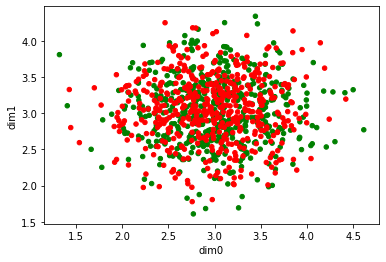

In [6]:
df_data_scenario_1.plot.scatter(x='dim0', y='dim1', c='label')

In [7]:
n_train = 400
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

In [8]:
trainer = ModelTrainerTorchBackend()
trained_obj = trainer.train(x_train, y_train, num_epochs=1000, batchsize=200)

input data N(sample-size)=400, N(dimension)=2
Getting median initial sigma value...
initial sigma by median-heuristics 0.443
Validation at 0. MMD^2 = 0.006100914256002454, obj-value = [-4.11102373] at sigma = [0.44279606]
[before optimization] sigma value = [0.44279606]
     5: avg train MMD^2 0.0020414671984347876 obj [-2.78349454],  avg val MMD^2 0.003496872610412982  obj [-3.55445412]  elapsed: 0.0 sigma: [0.52973297]
    25: avg train MMD^2 0.013331985727503756 obj [-3.68107741],  avg val MMD^2 0.02553176923791766  obj [-3.95584077]  elapsed: 0.0 sigma: [0.03573436]
    50: avg train MMD^2 0.01331316713609124 obj [-4.85848962],  avg val MMD^2 0.025000247700015264  obj [-5.52147083]  elapsed: 0.0 sigma: [0.00550807]
   100: avg train MMD^2 0.013304774882986557 obj [-4.85816857],  avg val MMD^2 0.025000005281321257  obj [-5.52146113]  elapsed: 0.0 sigma: [0.00462605]
   200: avg train MMD^2 0.013312878478956732 obj [-4.858542],  avg val MMD^2 0.025000001616170338  obj [-5.52146098]  

In [9]:
print(f'Preffered parameters sigma = {trained_obj.sigma} / scales = {trained_obj.scales}')

Preffered parameters sigma = 0.0034242453722189204 / scales = [3.0451725 2.566439 ]


In [10]:
mmd2, ratio = trainer.mmd_distance(x_test, y_test)
print(f'MMD^2 distance = {mmd2}')

MMD^2 distance = 0.020004634288500484


# Scenario-2: 2 distributions are not similar

In [11]:
x = np.random.normal(3, 0.5, size=(500, 2))
y = np.random.normal(10, 5.5, size=(500, 2))

In [12]:
df_x = pandas.DataFrame(x)
df_x['label'] = 'green'
df_y = pandas.DataFrame(y)
df_y['label'] = 'red'
df_data_scenario_1 = pandas.concat([df_x, df_y])
df_data_scenario_1.columns = ['dim0', 'dim1', 'label']

<AxesSubplot:xlabel='dim0', ylabel='dim1'>

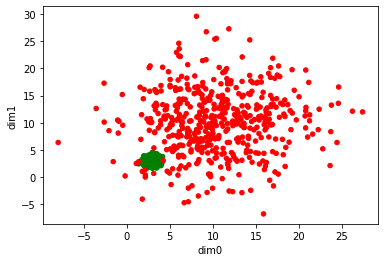

In [13]:
df_data_scenario_1.plot.scatter(x='dim0', y='dim1', c='label')

In [14]:
n_train = 400
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

In [15]:
trainer = ModelTrainerTorchBackend()
trained_obj = trainer.train(x_train, y_train, num_epochs=1000, batchsize=200)

input data N(sample-size)=400, N(dimension)=2
Getting median initial sigma value...
initial sigma by median-heuristics 2.89
Validation at 0. MMD^2 = 0.8632090267446728, obj-value = [-2.52463628] at sigma = [2.88552369]
[before optimization] sigma value = [2.88552369]
     5: avg train MMD^2 0.9638299743958036 obj [-3.43808956],  avg val MMD^2 0.9754571183104144  obj [-3.66674646]  elapsed: 0.0 sigma: [2.07402495]
    25: avg train MMD^2 0.8403074258707949 obj [-3.97316524],  avg val MMD^2 0.869366118799391  obj [-3.94126105]  elapsed: 0.0 sigma: [1.6833851]
    50: avg train MMD^2 0.840860472638792 obj [-3.92648143],  avg val MMD^2 0.8741006929070362  obj [-3.95712352]  elapsed: 0.0 sigma: [1.70897204]
   100: avg train MMD^2 0.842967010438466 obj [-3.92430645],  avg val MMD^2 0.8777733501959595  obj [-3.96846747]  elapsed: 0.0 sigma: [1.7282222]
   200: avg train MMD^2 0.8449201934705646 obj [-3.92151929],  avg val MMD^2 0.8772258941060674  obj [-3.9667121]  elapsed: 0.0 sigma: [1.731

In [16]:
print(f'Preffered parameters sigma = {trained_obj.sigma} / scales = {trained_obj.scales}')
mmd2, ratio = trainer.mmd_distance(x_test, y_test)
print(f'MMD^2 distance = {mmd2}')

Preffered parameters sigma = 1.7886863537923074 / scales = [1.1454995 1.17207  ]
MMD^2 distance = 0.8817076950383979


# Scenario-3: ARD weight

As you see in data generation, the data has huge variance only on __the 1st dimension__.

Then, the ARD weight has the highest value on the 1st dimension.

In [17]:
import numpy
size = 100
n_epoch = 500
batch_size = 200

x_1st_dim = numpy.random.normal(loc=1.0, scale=0.0, size=size)
y_1st_dim = numpy.random.normal(loc=1.0, scale=50.0, size=size)

x_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))
y_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))

x = numpy.concatenate([numpy.reshape(x_1st_dim, (size, 1)), x_2_and_3_dim], axis=1)
y = numpy.concatenate([numpy.reshape(y_1st_dim, (size, 1)), y_2_and_3_dim], axis=1)

x_train = x[:80]
y_train = y[:80]
x_val = x[80:]
y_val = y[80:]

In [18]:
for n_dim in [0, 1, 2]:
    print(f'{n_dim+1} dim. mean(x)={x[:,n_dim].mean()} mean(y)={y[:,n_dim].mean()} var(x)={x[:,n_dim].var()} var(y)={y[:,n_dim].var()}')
# end for

1 dim. mean(x)=1.0 mean(y)=2.500182060657529 var(x)=0.0 var(y)=2668.1374843990698
2 dim. mean(x)=9.982559335083733 mean(y)=10.003677264433485 var(x)=0.04210371525524367 var(y)=0.047995166170234686
3 dim. mean(x)=10.001701490300452 mean(y)=9.955154954188455 var(x)=0.03896402361060165 var(y)=0.040820972504931996


## Note

Make sure that __opt_sigma = False__ when you need ARD weights.

In [19]:
trainer = ModelTrainerTorchBackend()
trained_obj = trainer.train(x_train, y_train, num_epochs=500, batchsize=200, opt_sigma=False)

input data N(sample-size)=80, N(dimension)=3
Getting median initial sigma value...
initial sigma by median-heuristics 6.46
Validation at 0. MMD^2 = 0.7935938641572131, obj-value = [-1.67042885] at sigma = [6.46385808]
[before optimization] sigma value = [6.46385808]
     5: avg train MMD^2 0.6133583042800946 obj [-2.05643116],  avg val MMD^2 0.9303195651100904  obj [-1.74408679]  elapsed: 0.0 sigma: [6.46385808]
    25: avg train MMD^2 0.8181798099642043 obj [-2.58445118],  avg val MMD^2 0.9644917563409166  obj [-2.08777247]  elapsed: 0.0 sigma: [6.46385808]
    50: avg train MMD^2 0.9145886383133719 obj [-3.09209957],  avg val MMD^2 1.0305136467802192  obj [-2.56955494]  elapsed: 0.0 sigma: [6.46385808]
   100: avg train MMD^2 0.9887971720580356 obj [-3.76427175],  avg val MMD^2 1.0755447695442153  obj [-3.38080596]  elapsed: 0.0 sigma: [6.46385808]
   200: avg train MMD^2 1.014960991316104 obj [-4.50536115],  avg val MMD^2 1.0865019909017355  obj [-4.3137722]  elapsed: 0.0 sigma: [6.

In [20]:
trained_obj.scales

array([13.900133  ,  0.67261165,  0.83590186], dtype=float32)

# Scenario-4: 2 sample test

Note: You have to install "full" version to run the codes.

You will have a statistical test which checks 2 distributions are identical.

In [21]:
x = np.random.normal(3, 0.5, size=(500, 2))
y = np.random.normal(3, 0.5, size=(500, 2))

In [22]:
df_x = pandas.DataFrame(x)
df_x['label'] = 'green'
df_y = pandas.DataFrame(y)
df_y['label'] = 'red'
df_data_scenario_1 = pandas.concat([df_x, df_y])
df_data_scenario_1.columns = ['dim0', 'dim1', 'label']

<AxesSubplot:xlabel='dim0', ylabel='dim1'>

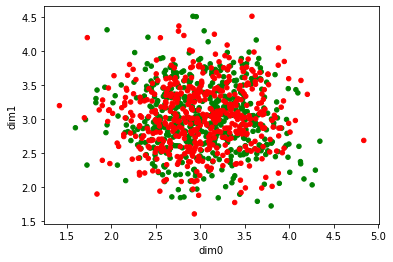

In [23]:
df_data_scenario_1.plot.scatter(x='dim0', y='dim1', c='label')

In [24]:
n_train = 400
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

In [25]:
trainer = ModelTrainerTorchBackend()
trained_obj = trainer.train(x_train, y_train, num_epochs=500, batchsize=200)

input data N(sample-size)=400, N(dimension)=2
Getting median initial sigma value...
initial sigma by median-heuristics 0.185
Validation at 0. MMD^2 = 0.013129845789768613, obj-value = [-4.87747304] at sigma = [0.18499193]
[before optimization] sigma value = [0.18499193]
     5: avg train MMD^2 0.010378023715460441 obj [-1.77892994],  avg val MMD^2 0.0163359568978991  obj [-1.82948807]  elapsed: 0.0 sigma: [0.16301332]
    25: avg train MMD^2 0.012754564010726437 obj [-2.78185319],  avg val MMD^2 0.02671726333102468  obj [-2.77556197]  elapsed: 0.0 sigma: [0.07535953]
    50: avg train MMD^2 0.013360303097456807 obj [-4.86271204],  avg val MMD^2 0.025041934169394306  obj [-5.52313688]  elapsed: 0.0 sigma: [0.0054379]
   100: avg train MMD^2 0.01333549598036363 obj [-4.86079922],  avg val MMD^2 0.025008088571213855  obj [-5.52178441]  elapsed: 0.0 sigma: [0.00414148]
   200: avg train MMD^2 0.013335463193873055 obj [-4.86079586],  avg val MMD^2 0.025009358014865007  obj [-5.52183517]  el

In [26]:
from model_criticism_mmd.supports.mmd_two_sample_test import rbf_mmd_test

res = rbf_mmd_test(x=x_test, y=y_test, trained_params=trained_obj)
p_value = res[0]
print(p_value)

1.0
